# Problem Set 2 
## Problem 2 - Fast.ai
## Javier Palomares
Note: I executed this on Paperspace
### Problem 4
Download a NOT pre-trained resnet34 (read the Fast.ai documentation to see how to do this),
and then by playing with the number of epochs and learning rates (possibly different learning
rates across layers), see how low you can get the error. Can you get below 20%?

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torchvision.models as models
from fastai.vision import *
from fastai.metrics import error_rate
# batchSize
bs = 64

### Load the pets data

In [4]:
# download the pets data
path = untar_data(URLs.PETS); path

PosixPath('/storage/oxford-iiit-pet')

In [5]:
# get the pets data
path_anno = path/'annotations'
path_img = path/'images'

fnames = get_image_files(path_img)

np.random.seed(2)
pat = re.compile(r'/([^/]+)_\d+.jpg$')

data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

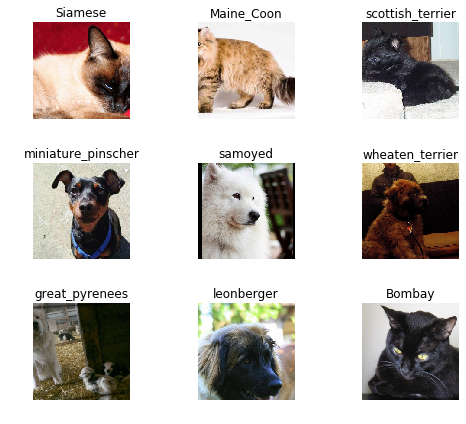

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Training: Resnet34 that has not been pretrained

In [14]:
#download a resnet34 model that has not been pre trained
learn = create_cnn(data,models.resnet34,metrics=error_rate,pretrained=False)

In [15]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,3.858172,3.706257,0.939107
2,3.656421,3.393417,0.895129
3,3.433341,3.129422,0.860622
4,3.246876,3.018151,0.820027


In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


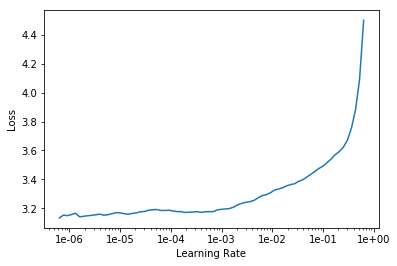

In [18]:
learn.recorder.plot()

In [20]:
learn.unfreeze()
learn.fit_one_cycle(4,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,3.141590,2.997653,0.819350
2,3.110278,2.972956,0.819350
3,3.088112,2.949578,0.807172
4,3.066309,2.944144,0.813261


In [21]:
learn.save('stage-1')

In [26]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category english_cocker_spaniel, Category shiba_inu, Category Siamese, Category yorkshire_terrier, Category american_bulldog]...
Path: /storage/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 333, 500), Image (3, 375, 500), Image (3, 500, 375), Image (3, 375, 500), Image (3, 334, 500)]...
Path: /storage/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category japanese_chin, Category Russian_Blue, Category scottish_terrier, Category Bengal, Category german_shorthaired]...
Path: /storage/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 500, 410), Image (3, 333, 500), Image (3, 332, 500), Image (3, 300, 300), Image (3, 334, 500)]...
Path: /storage/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affin

In [27]:
learn.fit_one_cycle(8,max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate
1,3.178765,3.212318,0.876184
2,3.267846,3.346110,0.869418
3,3.106304,3.035058,0.848444
4,2.873508,3.236974,0.851827
5,2.642141,2.547399,0.730041
6,2.405125,2.235546,0.667118
7,2.157529,2.021127,0.615020
8,2.022258,1.928837,0.592016


In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


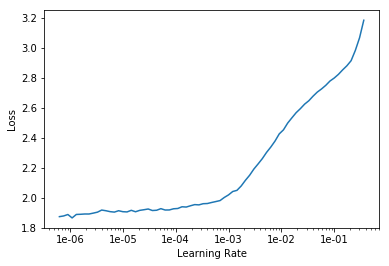

In [29]:
learn.recorder.plot()

In [30]:
learn.save('stage-2')
# why do my plots look like this?

In [31]:
learn.fit_one_cycle(8,max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate
1,1.948056,1.974945,0.596752
2,2.079157,2.267092,0.654263
3,2.060713,2.115546,0.635318
4,1.940248,2.225605,0.621786
5,1.790113,1.783409,0.549391
6,1.625502,1.644996,0.508119
7,1.502957,1.497087,0.454668
8,1.428241,1.464517,0.452639


In [32]:
learn.save('stage-3')

In [44]:
learn.load('stage-3')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category english_cocker_spaniel, Category shiba_inu, Category Siamese, Category yorkshire_terrier, Category american_bulldog]...
Path: /storage/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 333, 500), Image (3, 375, 500), Image (3, 500, 375), Image (3, 375, 500), Image (3, 334, 500)]...
Path: /storage/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category japanese_chin, Category Russian_Blue, Category scottish_terrier, Category Bengal, Category german_shorthaired]...
Path: /storage/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 500, 410), Image (3, 333, 500), Image (3, 332, 500), Image (3, 300, 300), Image (3, 334, 500)]...
Path: /storage/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affin

In [45]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


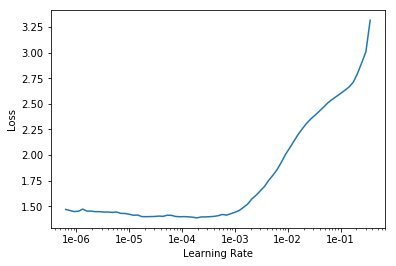

In [46]:
learn.recorder.plot()

In [47]:
learn.unfreeze()
learn.fit_one_cycle(8,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,1.389745,1.465230,0.448579
2,1.385618,1.454855,0.451286
3,1.394156,1.448781,0.447903
4,1.384853,1.431857,0.441813
5,1.353073,1.426569,0.439107
6,1.359131,1.424824,0.439783
7,1.361155,1.424501,0.439107
8,1.365599,1.422693,0.437754


In [48]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [49]:
learn.save('stage-4')

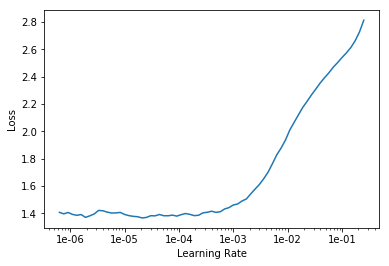

In [50]:
learn.recorder.plot()

In [54]:
learn.load('stage-4')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category english_cocker_spaniel, Category shiba_inu, Category Siamese, Category yorkshire_terrier, Category american_bulldog]...
Path: /storage/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 333, 500), Image (3, 375, 500), Image (3, 500, 375), Image (3, 375, 500), Image (3, 334, 500)]...
Path: /storage/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category japanese_chin, Category Russian_Blue, Category scottish_terrier, Category Bengal, Category german_shorthaired]...
Path: /storage/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 500, 410), Image (3, 333, 500), Image (3, 332, 500), Image (3, 300, 300), Image (3, 334, 500)]...
Path: /storage/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affin

In [55]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


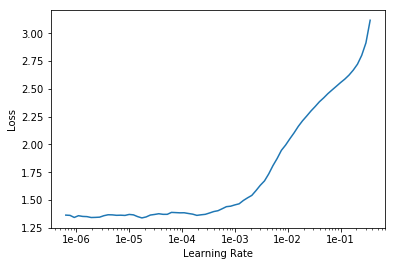

In [56]:
learn.recorder.plot()

In [57]:
learn.fit_one_cycle(3,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,1.335868,1.419860,0.435047
2,1.337058,1.416310,0.436401
3,1.320803,1.416608,0.430311


In [61]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


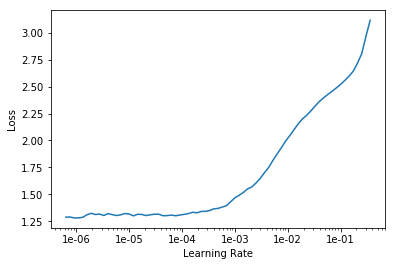

In [62]:
learn.recorder.plot()

In [63]:
learn.fit_one_cycle(3,max_lr=slice(1e-6,5e-5))

epoch,train_loss,valid_loss,error_rate
1,1.345206,1.420545,0.439783
2,1.320977,1.412795,0.439107
3,1.336790,1.412573,0.439783


In [64]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


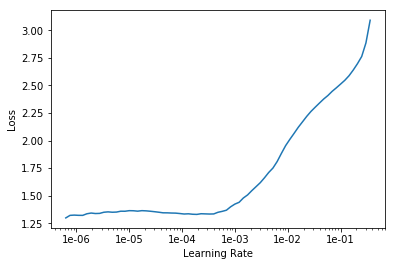

In [65]:
learn.recorder.plot()

In [66]:
learn.fit_one_cycle(10,max_lr=slice(1e-4,5e-3))

epoch,train_loss,valid_loss,error_rate
1,1.369756,1.565010,0.492557
2,1.617047,2.316883,0.641407
3,1.779584,2.001264,0.600135
4,1.731578,2.202451,0.619080
5,1.639800,1.599484,0.488498
6,1.478357,1.563891,0.479026
7,1.269244,1.494651,0.447226
8,1.097861,1.177920,0.365359
9,0.981871,1.084234,0.341001
10,0.887030,1.075895,0.338295


In [67]:
learn.save('stage-5')

The error rate is coming down, I'll try running 10 epochs again

In [69]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


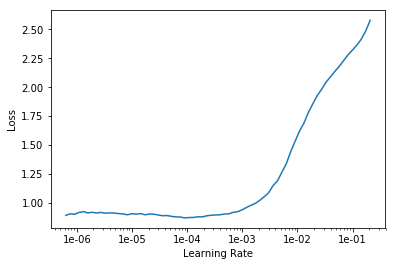

In [70]:
learn.recorder.plot()

In [71]:
learn.fit_one_cycle(10,max_lr=slice(1e-4,5e-3))

epoch,train_loss,valid_loss,error_rate
1,0.930648,1.152642,0.362652
2,1.095856,1.750707,0.502030
3,1.290322,1.648293,0.506089
4,1.293823,1.753978,0.495264
5,1.207166,1.449252,0.432341
6,1.061000,1.333627,0.399865
7,0.932772,1.172849,0.358593
8,0.794106,0.985950,0.305142
9,0.681742,0.948558,0.297700
10,0.622711,0.942571,0.294317


In [72]:
learn.save('stage-5')

The error rate is going down, I'll fit some more

In [73]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


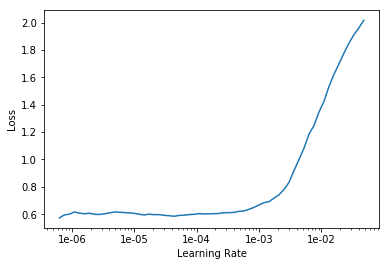

In [74]:
learn.recorder.plot()

In [75]:
learn.fit_one_cycle(10,max_lr=slice(1e-4,5e-3))

epoch,train_loss,valid_loss,error_rate
1,0.640262,1.109783,0.344384
2,0.807266,1.373936,0.397835
3,0.996250,1.373997,0.414073
4,1.012437,1.407699,0.408660
5,0.984494,1.391017,0.410690
6,0.857274,1.168599,0.348444
7,0.753185,1.083033,0.326793
8,0.612640,0.959522,0.286198
9,0.505453,0.923634,0.276049
10,0.462423,0.916791,0.278755


In [76]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


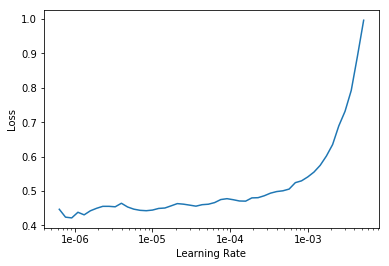

In [77]:
learn.recorder.plot()

I'll run a few more epochs

In [78]:
learn.fit_one_cycle(5,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.448540,0.913802,0.277402
2,0.455829,0.913210,0.276049
3,0.445355,0.912334,0.271313
4,0.438490,0.900774,0.269283
5,0.422029,0.897274,0.270636


In [79]:
learn.save('stage-6')

In [80]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


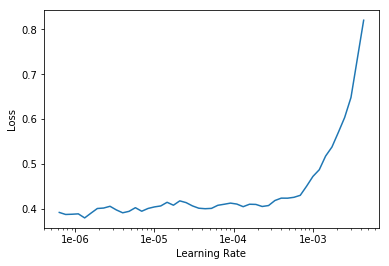

In [81]:
learn.recorder.plot()

In [82]:
learn.fit_one_cycle(10,max_lr=slice(1e-5,5e-3))

epoch,train_loss,valid_loss,error_rate
1,0.417322,0.906146,0.268606
2,0.447459,0.983210,0.280108
3,0.488001,1.098195,0.308525
4,0.538346,1.067062,0.287551
5,0.503939,1.002879,0.292963
6,0.453598,1.014915,0.289581
7,0.402575,0.986529,0.274019
8,0.355747,0.994091,0.267930
9,0.326643,0.971228,0.269959
10,0.317467,0.957206,0.264547


In [83]:
learn.save('stage-6')

The error isn't decreasing much now.

In [84]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


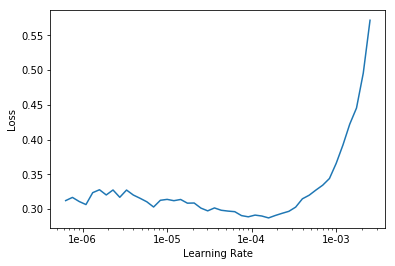

In [85]:
learn.recorder.plot()

In [86]:
learn.fit_one_cycle(5,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.290457,0.956629,0.263194
2,0.302345,0.968898,0.273342
3,0.295331,0.971527,0.263870
4,0.280742,0.957535,0.262517
5,0.286637,0.958174,0.259134


In [87]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


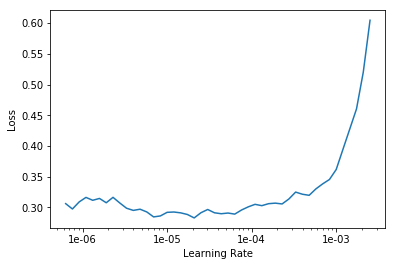

In [88]:
learn.recorder.plot()

In [89]:
learn.fit_one_cycle(10,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.277756,0.957756,0.259811
2,0.285726,0.957216,0.257781
3,0.295250,0.977196,0.265223
4,0.291110,0.966199,0.270636
5,0.272349,0.947396,0.263194
6,0.273716,0.969199,0.265223
7,0.281491,0.964356,0.263194
8,0.268800,0.966605,0.267253
9,0.278111,0.965372,0.271989
10,0.257514,0.953666,0.265900


I'm not seeing the error rate come down from around .26, and don't expect that running more epochs even at different rates would get the error rate under .2

### Question 7

#### Instructions
And for the main part of this exercise: download (and label) your own data set of your choice,
create a classification problem, and then use the main tools/ideas of this notebook to build a
classifier. It does not need to be a multi-label classier.

#### Solution
I created a dataset by downloading images using Bing Search API. I found a good article that explained how to do this at https://www.pyimagesearch.com/2018/04/09/how-to-quickly-build-a-deep-learning-image-dataset/#

I created a separate python script do create my data set: `create_dataset.py` and used it to download approximately 850 images each of Pikachu and Squirtle that I have zipped up and uploaded to Paperspace. I will train a classification model on this dataset.

In [3]:
import zipfile
# expand the zip
dataset_file = "/storage/dataset.zip"
zip_ref = zipfile.ZipFile(dataset_file, 'r')
zip_ref.extractall("/storage/dataset")
zip_ref.close()

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import torchvision.models as models
from fastai.vision import *
from fastai.metrics import error_rate
# batchSize
bs = 64

#### Loading the Data

I'll load the data from the dataset I built, and set 20% of the data to be chosen for validation

In [2]:
data = ImageDataBunch.from_folder(path="/storage/dataset",valid_pct=0.2,bs=bs,size=224,ds_tfms=get_transforms()).normalize(imagenet_stats)

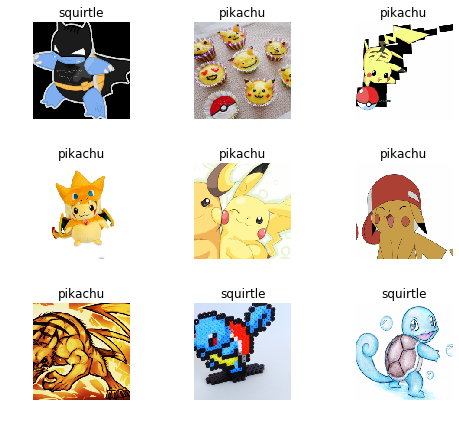

In [3]:
data.show_batch(rows=3, figsize=(7,6))

In [4]:
print(data.classes)
len(data.classes),data.c

['pikachu', 'squirtle']


(2, 2)

So far the data load looks good. There are 2 classes for the images "Squirtle, and Pikachu"

In [4]:
np.random.seed(2)

#### Training the model
I'll use a pretrained resnet 34 to train on my dataset

In [4]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [5]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [6]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.640946,0.195605,0.066406
2,0.394578,0.162002,0.054688
3,0.303231,0.128261,0.054688
4,0.239137,0.120937,0.046875


Even after just 4 epochs, the error rate is already very low

In [7]:
learn.save('stage-1')

In [8]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

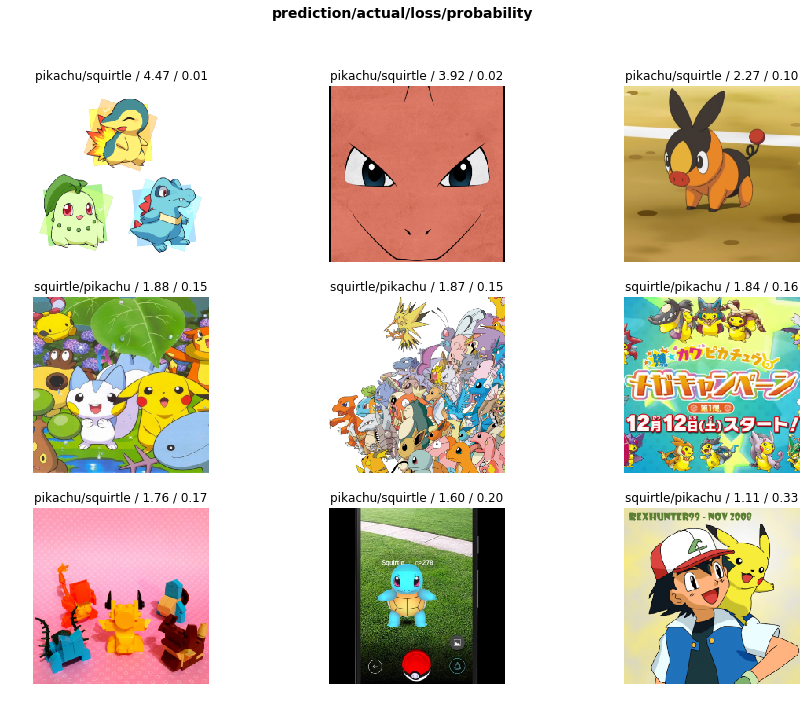

In [9]:
interp.plot_top_losses(9, figsize=(15,11))

In [10]:
doc(interp.plot_top_losses)

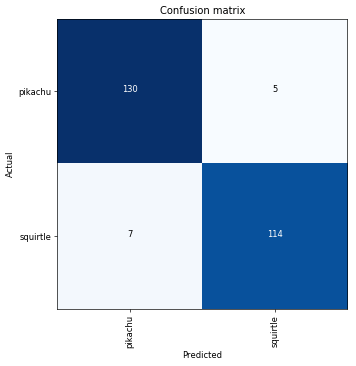

In [13]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

I can see that the most confused images are those where there are multiple subjects in the picture. I'll continue training

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


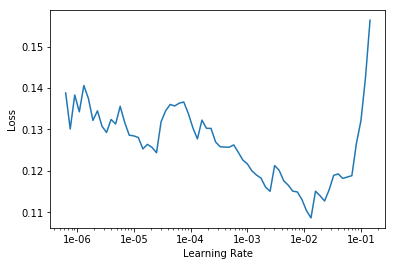

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,5e-3))

epoch,train_loss,valid_loss,error_rate
1,0.134032,0.115088,0.035156
2,0.131907,0.120194,0.039062


The model is very accurate!